# Model - LSTM

In [1]:
import pandas as pd

file = "/workspaces/AML_Assignment-2/AML_Assignment-2/movie.csv"
data = pd.read_csv(file)

In [2]:
pd.set_option("display.max_colwidth", 1000)
data.head(5)

,text,label
0,"I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played ""Thunderbirds"" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.",0
1,"When I put this movie in my DVD player, and sat down with a coke and some chips, I had some expectations. I was hoping that this movie would contain some of the strong-points of the first movie: Awsome animation, good flowing story, excellent voice cast, funny comedy and a kick-ass soundtrack. But, to my disappointment, not any of this is to be found in Atlantis: Milo's Return. Had I read some reviews first, I might not have been so let down. The following paragraph will be directed to those who have seen the first movie, and who enjoyed it primarily for the points mentioned.<br /><br />When the first scene appears, your in for a shock if you just picked Atlantis: Milo's Return from the display-case at your local videoshop (or whatever), and had the expectations I had. The music feels as a bad imitation of the first movie, and the voice cast has been replaced by a not so fitting one. (With the exception of a few characters, like the voice of Sweet). The actual drawings isnt that ba...",0
2,"Why do people who do not know what a particular time in the past was like feel the need to try to define that time for others? Replace Woodstock with the Civil War and the Apollo moon-landing with the Titanic sinking and you've got as realistic a flick as this formulaic soap opera populated entirely by low-life trash. Is this what kids who were too young to be allowed to go to Woodstock and who failed grade school composition do? ""I'll show those old meanies, I'll put out my own movie and prove that you don't have to know nuttin about your topic to still make money!"" Yeah, we already know that. The one thing watching this film did for me was to give me a little insight into underclass thinking. The next time I see a slut in a bar who looks like Diane Lane, I'm running the other way. It's child abuse to let parents that worthless raise kids. It's audience abuse to simply stick Woodstock and the moonlanding into a flick as if that ipso facto means the film portrays 1969.",0
3,"Even though I have great interest in Biblical movies, I was bored to death every minute of the movie. Everything is bad. The movie is too long, the acting is most of the time a Joke and the script is horrible. I did not get the point in mixing the story about Abraham and Noah together. So if you value your time and sanity stay away from this horror.",0
4,"Im a die hard Dads Army fan and nothing will ever change that. I got all the tapes, DVD's and audiobooks and every time i watch/listen to them its brand new. <br /><br />The film. The film is a re run of certain episodes, Man and the hour, Enemy within the gates, Battle School and numerous others with a different edge. Introduction of a new General instead of Captain Square was a brilliant move - especially when he wouldn't cash the cheque (something that is rarely done now).<br /><br />It follows through the early years of getting equipment and uniforms, starting up and training. All in all, its a great film for a boring Sunday afternoon. <br /><br />Two draw backs. One is the Germans bogus dodgy accents (come one, Germans cant pronoun

Cleaning text data

In [3]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

data['text'] = data['text'].apply(clean_text)

Tokenize and Pad sequence

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000
embedding_dim = 100
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_token = '<OOV>'

# Tokenizer
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(data['text'])

# Convert to sequences
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad sequences
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

2024-07-17 01:18:30.932167: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 01:18:30.936145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-17 01:18:30.948307: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-17 01:18:30.964775: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-17 01:18:30.969022: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-17 01:18:30.981115: I tensorflow/core/platform/cpu_feature_gu

Encode Labels

In [5]:
import numpy as np

# Assuming the labels are in a column named 'label'
labels = np.array(data['label'])

Build LSTM Model

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train Model

In [7]:
# Train the model
history = model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

Epoch 1/10


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 265s 263ms/step - accuracy: 0.5205 - loss: 0.6922 - val_accuracy: 0.5305 - val_loss: 0.6922
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 319s 260ms/step - accuracy: 0.5450 - loss: 0.6826 - val_accuracy: 0.8400 - val_loss: 0.3834
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 263s 263ms/step - accuracy: 0.8582 - loss: 0.3417 - val_accuracy: 0.8773 - val_loss: 0.2973
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 255s 255ms/step - accuracy: 0.9213 - loss: 0.2161 - val_accuracy: 0.8702 - val_loss: 0.3248
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 261s 254ms/step - accuracy: 0.9477 - loss: 0.1519 - val_accuracy: 0.8746 - val_loss: 0.3471
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 260s 252ms/step - accuracy: 0.9691 - loss: 0.1067 - val_accuracy: 0.8708 - val_loss: 0.3840
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 263s 253ms/step - accuracy: 0.9806 - loss: 0.0756 - val_accuracy: 0.8644 - val_loss: 0.4472
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 260s 252ms/step - accuracy: 0.9

Evaluate Model

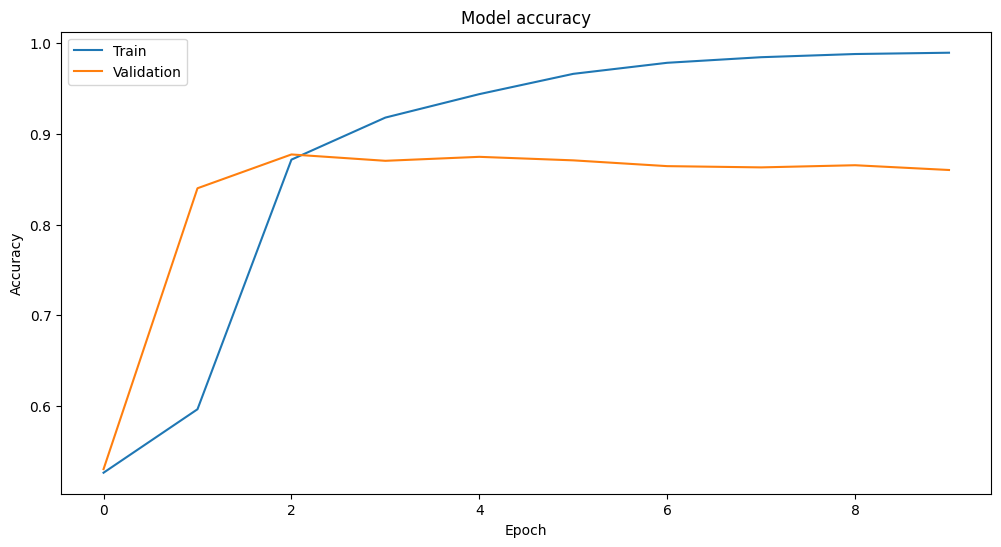

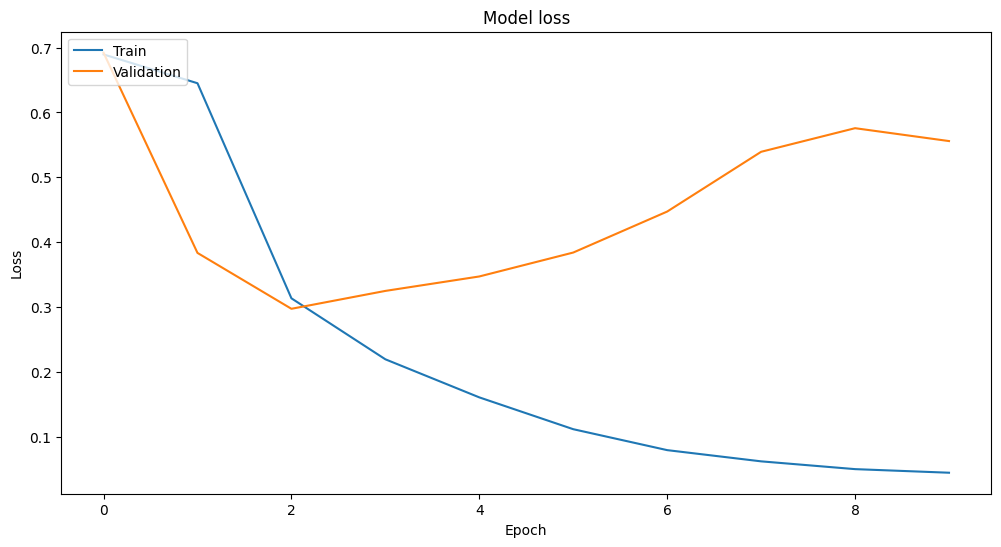

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Make Predictions and Evaluate Performance

In [9]:
predictions = model.predict(padded_sequences)
predictions = [1 if p >= 0.5 else 0 for p in predictions]

print("Accuracy:", accuracy_score(labels, predictions))
print(classification_report(labels, predictions))

1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 68ms/step


NameError: name 'accuracy_score' is not defined